In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
GTA = False

In [3]:
metric_translations = {
    'rmse': 'RMSE (km$\cdot$s$^{-1}$)',
    'mae': 'MAE (km$\cdot$s$^{-1}$)',
    'corr': 'Pearson\'s correlation coefficient',
    'r2': 'R$^{2}$'
}

In [4]:
model = 'SVR'
model_file_name = 'svr'

if GTA:
    model = 'GTA'
    model_file_name = 'gta'

In [5]:
if not GTA:
    experimental_results = pd.read_csv('results/performance_metrics_svr_1d_24d.csv', index_col=0)
else:
    index = ['(1, 1)',
        '(1, 2)',
        '(1, 3)',
        '(1, 4)',
        '(2, 1)',
        '(2, 2)',
        '(2, 3)',
        '(2, 4)',
        '(3, 1)',
        '(3, 2)',
        '(3, 3)',
        '(3, 4)',
        '(4, 1)',
        '(4, 2)',
        '(4, 3)',
        '(4, 4)',
        '(5, 1)',
        '(5, 2)',
        '(5, 3)',
        '(5, 4)']
    
    # Values extracted directly from Sun et al.'s work
    rmse = [
            104.5,  86.0,   90.26,  91.34,
            69.65,  92.78,  100.65, 104.54,
            88.75,  96.71,  101.57, 100.76,
            104.17, 100.36, 100.87, 100.69,
            113.64, 99.9,   100.26, 97.76
    ]
    
    mae = [
            80.94,  67.27,  71.90,  74.82,
            56.11,  77.09,  84.63,  82.07,
            76.75,  81.16,  85.29,  93.90,
            82.61,  85.50,  85.26,  84.13,
            99.67,  83.81,  85.26,  81.74
    ]
    
    corr = [
            0.61,  0.54,   0.47,  0.45,
            0.74,  0.42,   0.20,  0.20,
            0.64,  0.34,   0.14,  0.17,
            0.13,  0.37,   0.27,  0.24,
            0.58,  0.26,   0.27,  0.33
    ]
    
    d = {'1h_rmse': rmse, '1h_mae': mae, '1h_corr': corr}
    
    experimental_results = pd.DataFrame(d, index=index)
    
try:
    experimental_results['1h_corr'] = experimental_results['1h_corr'].apply(lambda x: eval(x)[0])
except:
    pass
experimental_results

,1h_rmse,1h_mae,1h_mbe,1h_corr,1h_r2
"(1, 1)",85.535047,59.721155,-29.362841,0.681692,0.391263
"(1, 2)",108.399972,79.901543,-41.891104,0.412070,0.022312
"(1, 3)",116.409209,88.629841,-47.346928,0.248626,-0.127500
"(1, 4)",118.734942,90.828721,-49.758376,0.194177,-0.173002
"(2, 1)",83.166578,59.470947,-27.355918,0.701429,0.424508
"(2, 2)",100.920888,76.293182,-35.093219,0.515102,0.152570
"(2, 3)",108.263898,83.856226,-40.455265,0.436310,0.024765
"(2, 4)",110.447161,85.547588,-42.617351,0.424159,-0.014965
"(3, 1)",81.211218,58.479194,-25.097521,0.713978,0.451251
"(3, 2)",94.476305,72.202758,-29.525098,0.587609,0.257344


In [6]:
indices = experimental_results.index.values
indices

array(['(1, 1)', '(1, 2)', '(1, 3)', '(1, 4)', '(2, 1)', '(2, 2)',
       '(2, 3)', '(2, 4)', '(3, 1)', '(3, 2)', '(3, 3)', '(3, 4)',
       '(4, 1)', '(4, 2)', '(4, 3)', '(4, 4)', '(5, 1)', '(5, 2)',
       '(5, 3)', '(5, 4)'], dtype=object)

In [7]:
x = []
y = []
for v in indices:
    xp, yp = eval(v)
    x.append(xp)
    y.append(yp)

x = np.array(x)
y = np.array(y)

In [8]:
aggregation = '1h'
metric = 'corr'
z = f'{aggregation}_{metric}'

In [11]:
markers = ['.', 'v', 's', '+', 'X']
styles = ['solid', 'dashed', 'dashdot', 'dashed']

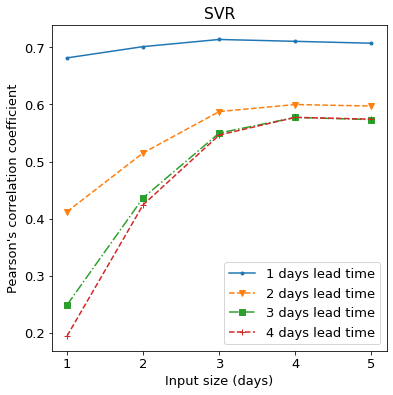

In [12]:
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(6, 6))
leg_labels = []

cur_style = 0

for lead in np.unique(y):
    indices = [f'({in_size}, {lead})' for in_size in np.unique(x)]
    plt.plot(np.unique(x), experimental_results[z][indices], linestyle=styles[cur_style],
            marker=markers[cur_style])
    leg_labels.append(f'{lead} days lead time')
    cur_style+=1
plt.xlabel('Input size (days)')
plt.ylabel(f'{metric_translations[metric]}')
plt.legend(leg_labels)
plt.title(f'{model}')
plt.savefig(f'figs/{metric}_{model_file_name}.png', bbox_inches='tight')
plt.show()